# Depression Survey Analysis

Author: Elijah Lopez

## Overview

Understanding contributing factors to depression is of utmost importance to medical experts for diagnostic purposes and to make recommendations for holistic care. This analysis investigates the responses of 2,500+ adults (ages 18-60) to better understand the factors contributing to depression risk. This analysis reveals significant differences in response distributions between at-risk and non-risk groups, highlighting variations in habits such as sleep and diet as well as stressors like academic and work pressures.

## Business Problem

Current diagnostic practices for depression often depend on subjective clinical evaluations, which may overlook subtle yet critical lifestyle behaviors and stress factors. To enhance diagnostic accuracy and improve intervention strategies, we must identify and quantify the behavioral indicators that distinguish at-risk individuals from their non-risk counterparts.

This analysis shows that there are statistically significant differences in many response categories between depression risk groups. Those at risk of depression are primarily younger in age, students with at most a high school education, have poor sleeping habits, and are not eating well. They also more commonly identify as having past thoughts of suicide and have real or perceived:
* Increased academic pressure
* Increased work pressure
* Decreased job satisfaction
* Increased amounts of time working/studying 
* Increased financial stress

This survey is based on individual self-reporting and does not include any medical data related to depression diagnoses. While the survey falls short of offering clincial information, it is still helpful to consider risk factors for depression so that medical professionals can make accurate diagnoses and tailored recommendations for holistic care. Understanding the habits and stresses individuals face is only part of the solution and more research can be conducted in clincial setting to better understand contributing factors to mental wellness and depression.

## Data

This data was retrieved from [Kaggle](https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis) and was originally collected between January and June 2023. It includes volunteered information from survey participants on age, gender, city, degree, job satisfaction, study satisfaction, study/work hours, and family history of mental illness, among others. Participants were asked to provide inputs without requiring any professional mental health assessments or diagnostic test scores. The target variable, 'Depression', represents whether the individual is at risk of depression, marked as 'Yes' or 'No', based on their responses to lifestyle and demographic factors.

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Stats
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/depression_data.csv')
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [4]:
df.isna().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [5]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [6]:
df.describe(include='object')

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,2556,2556,2556,2556,1883,2556,2556,2556,2556,2556,2556
unique,216,2,30,2,35,4,3,27,2,2,2
top,Rohan,Male,Srinagar,Working Professional,Teacher,7-8 hours,Unhealthy,Class 12,No,No,No
freq,26,1333,102,2054,322,658,882,275,1307,1311,2101


Initial Survey Data Understanding:

* This data contains 2,556 survey responses on 19 metrics. Some of these include age, city, hours of sleep, diet, financial stress, family history of illness, and the target variable, depression.
* There is a mix of string and numeric data.
* There is null data is several categories which might mean that the respondent did not want to volunteer that information or that the question did not apply to them.

Descriptive stats of numeric data:
* The average age of respondents is 39.
* Academic and work pressure both average 3 out of 5.
* Similarly, study satisfaction and job satisfaction are 3 out of 5.
* CGPA is a metric that quantifies satisfaction with healthcare services. The range is 1-10 and average response is 7.6.
* Most individuals surveyed work/study for approximately 6 hours per day, while the maximum is 12.
* Individuals of this suvery do not generally experience financial stress, with an average of ~3.

Descriptive stats of string-type data (most common responses):
* A little over half of respondents are males
* Teacher as profession
* 7-8 hours of sleep per night
* Classify their diet as "unhealthy"
* High school graduates
* A little over half have had suicidal thoughts at least once and report family history of mental illness
* Large majority (82%) are not at risk of depression.

### Data Cleaning

Before jumping into analysis let's standardize the naming convention of the columns to make the data easier to work with.

In [7]:
# View columns to account for naming conventions
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
# Drop ? from naming convention and replace spaces with underscores.
# Also make all columns lower case
df.columns = [column.replace(' ?', '').replace(' ', '_').lower() for column in df.columns]

df.drop(columns=['name'], inplace=True)

In [9]:
# Check
df.columns

Index(['gender', 'age', 'city', 'working_professional_or_student',
       'profession', 'academic_pressure', 'work_pressure', 'cgpa',
       'study_satisfaction', 'job_satisfaction', 'sleep_duration',
       'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts',
       'work/study_hours', 'financial_stress',
       'family_history_of_mental_illness', 'depression'],
      dtype='object')

### Survey Data Distribution

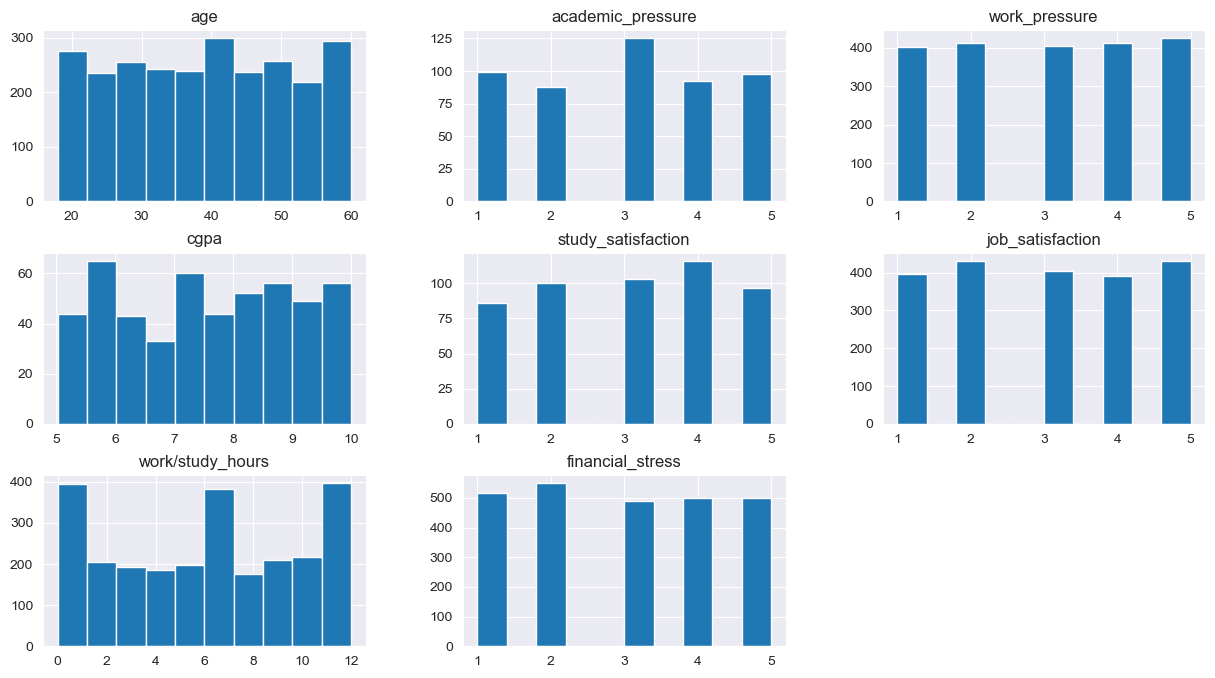

In [10]:
# Check distribution of data for numeric columns
df.hist(figsize=(15, 8));

Here we see:
* Near-uniform distributions across age, work pressure, study satisfaction, job satisfaction, and financial stress.
* Academic pressure is closer to a normal distribution
* CGPA shows a slightly skewed distribution
* work/study hours shows an abnormal distribution.

I'd be curious to investigate how the extreme values may relate to depression.

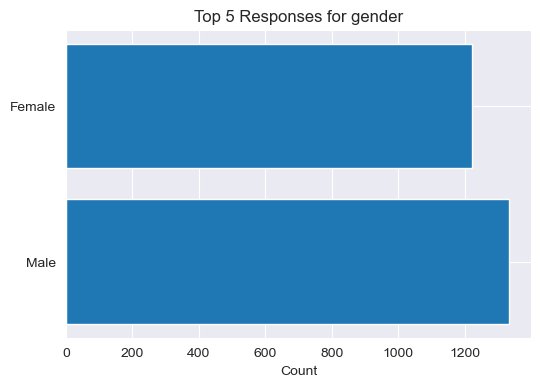

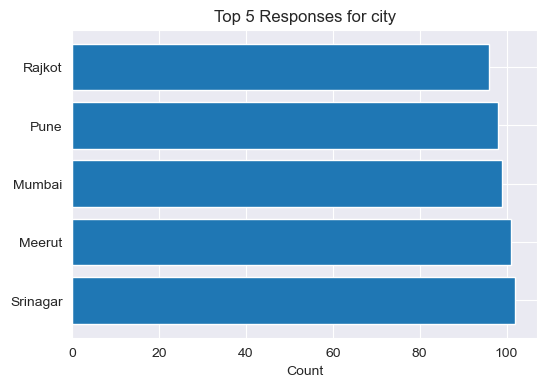

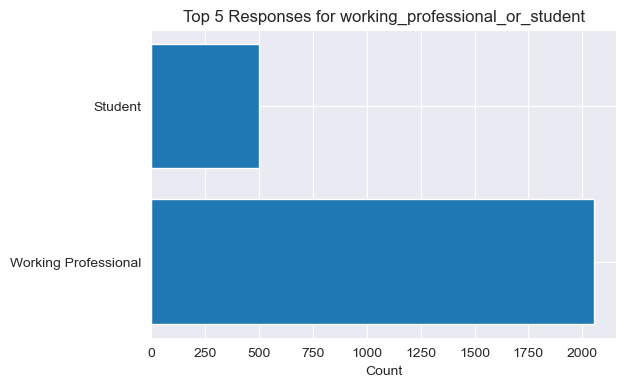

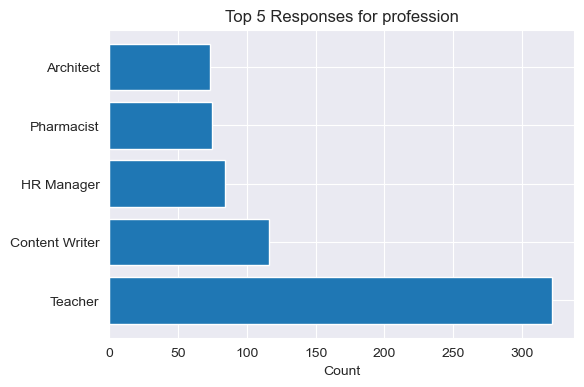

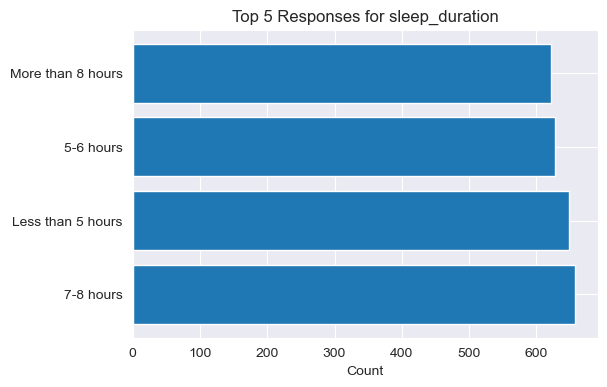

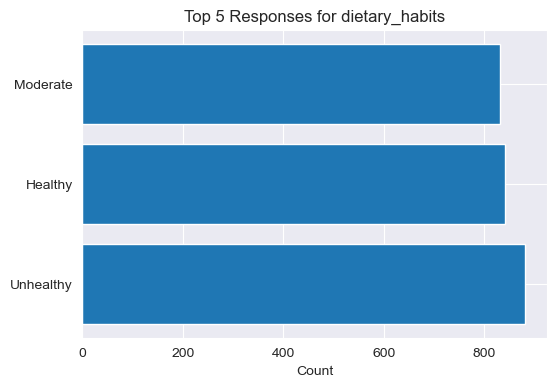

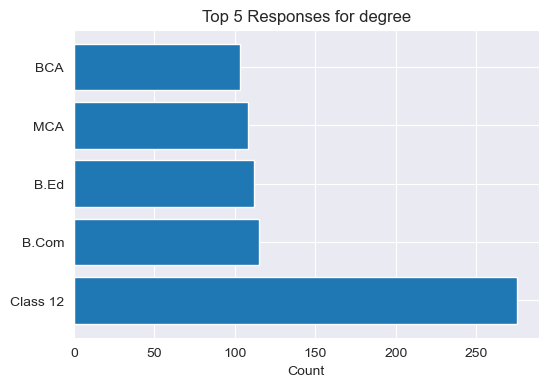

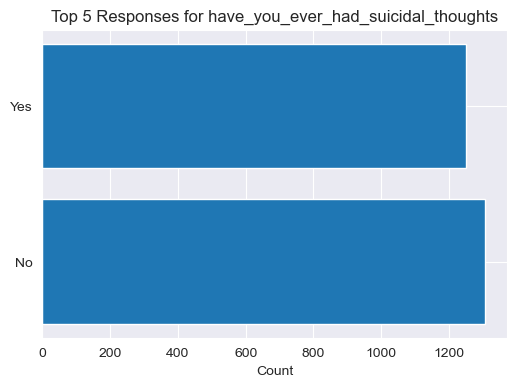

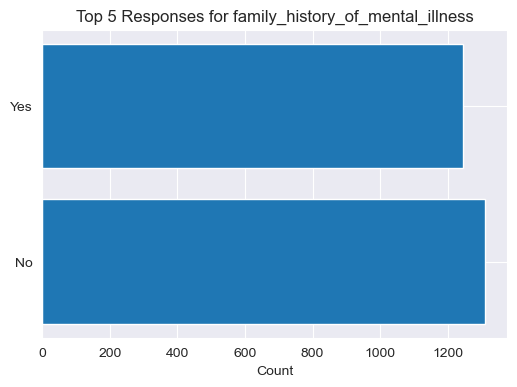

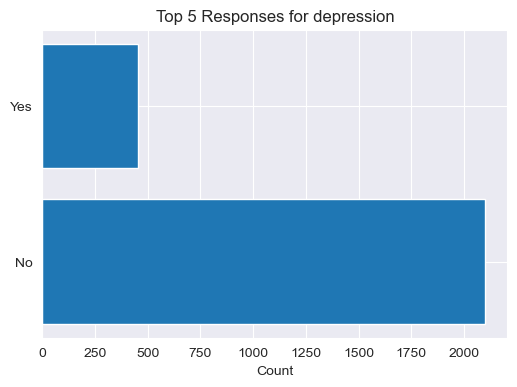

In [11]:
# Isolate categorical data columns and assign to new dataframe
cat_cols = df.select_dtypes('object').columns
cat_df = df[cat_cols]

# Plot distribution of each column
for column in cat_cols:
    data = df[column].value_counts().head()
    x = data.index
    y = data.values

    plt.figure(figsize=(6, 4))
    plt.barh(x, y)
    plt.title(f"Top 5 Responses for {column}")
    plt.xlabel('Count')
    plt.show();

These are the top 5 responses for each categorical column. Here we see :
* A near-uniform distribution across gender, top 5 cities, sleep duration, dietary habits, previous thoughts of suicide, and family history of mental illness.
* A large majority of working professionals compared to students
* Many more teachers than the next highest profession.
* Many more high school graduates than other classes of education. This is not super surprising as this is the required level of schooling in many countries wheras additional education is optional.
* There is a strong class imbalance in favor of individuals who are **not** at risk of depression.

## Data Comparisons by Risk of Depression

Now that we have an understanding of the distribution of responses from all survery participants, let's explore differences between those at risk for depression vs those that are not.

### Numeric Data Comparisons

In [12]:
# Isolate at-risk individuals ('depression' = 'Yes')
at_risk_df = df.loc[df['depression'] == 'Yes']
at_risk_df.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,financial_stress
count,455.000000,252.000000,203.000000,252.000000,252.000000,203.000000,455.000000,455.000000
mean,26.263736,3.662698,3.866995,7.632937,2.674603,2.300493,7.259341,3.472527
std,6.881686,1.227717,1.237630,1.455422,1.343892,1.347293,3.572841,1.374249
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,21.000000,3.000000,3.000000,6.250000,1.750000,1.000000,4.000000,2.000000
50%,25.000000,4.000000,4.000000,7.810000,3.000000,2.000000,8.000000,4.000000
75%,30.000000,5.000000,5.000000,8.860000,4.000000,3.000000,10.000000,5.000000
max,51.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [13]:
# Isolate non-risk individuals ('depression' = 'No')
not_at_risk_df = df.loc[df['depression'] == 'No']
not_at_risk_df.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,financial_stress
count,2101.000000,250.000000,1851.000000,250.000000,250.00000,1851.000000,2101.000000,2101.000000
mean,41.810566,2.340000,2.929227,7.502160,3.48000,3.093463,5.756307,2.859591
std,11.384505,1.219158,1.405343,1.475326,1.28382,1.404401,3.761157,1.400949
min,18.000000,1.000000,1.000000,5.060000,1.00000,1.000000,0.000000,1.000000
25%,33.000000,1.000000,2.000000,6.115000,3.00000,2.000000,2.000000,2.000000
50%,43.000000,2.000000,3.000000,7.460000,4.00000,3.000000,6.000000,3.000000
75%,51.000000,3.000000,4.000000,8.762500,5.00000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.00000,5.000000,12.000000,5.000000


Between the at-risk group and the non-risk group we see:
* A rather large difference in age, with at-risk respondents 16 years younger on average
* At-risk individual face increased academic and work pressure on average with the median showing an even larger gap.
* Satisfaction with the survey and with their own jobs are both lower in the at-risk group.
* At-risk respondents report working/studying 1.5 hours more on average with the median being 2 hours more.
* Financial stress is more prevalant in the at-risk group.

### Statistical Analysis

It will be interesting to see if these differences are statistically significant. Let's set up paired t-tests to compare the groups. ***Because the ttest_ind from Scipy Stats assumes equal variance***, we first need to use Levene's test to make sure we use this test appropriately.

In [14]:
# H0: Variances are equal
# H1: Variances are not equal
alpha = 0.05

# Isolate numeric columns and apply Levene's test of equal variance
num_cols = at_risk_df.select_dtypes(include='number').columns

for column in num_cols:
    # Drop nulls so they don't interfere with results
    group_1 = at_risk_df[column].dropna()
    group_2 = not_at_risk_df[column].dropna()

    stat, p_value = stats.levene(group_1, group_2)

    if p_value > alpha:
        print(f"{column}: Equal variances.")
    else:
        print(f"{column}: Different variance.")

age: Different variance.
academic_pressure: Equal variances.
work_pressure: Different variance.
cgpa: Equal variances.
study_satisfaction: Equal variances.
job_satisfaction: Different variance.
work/study_hours: Different variance.
financial_stress: Equal variances.


Great! Now that we know which columns have equal variances and which ones don't we can effectively apply ttest_ind from Scipy Stats.

In [15]:
diff_var_cols = [
    'age',
    'work_pressure',
    'job_satisfaction',
    'work/study_hours'
]

equal_var_cols = [
    'academic_pressure',
    'cgpa',
    'study_satisfaction',
    'financial_stress'
]

In [16]:
# H0: There is no significant difference in the average value for the given column among at-risk and not-at-risk groups.
# H1: There is a significant difference in the average value for the given column between at-risk and not-at-risk groups.

alpha = 0.05

for column in diff_var_cols:
    group_1 = at_risk_df[column].dropna()
    group_2 = not_at_risk_df[column].dropna()

    stat, p_value = stats.ttest_ind(group_1, group_2, equal_var=False)

    if p_value < alpha:
        print(f"{column}: Reject the null: There is a significant difference between average values.")
    else:
        print(f"{column}: Fail to reject the null: No significant difference between average values.")

age: Reject the null: There is a significant difference between average values.
work_pressure: Reject the null: There is a significant difference between average values.
job_satisfaction: Reject the null: There is a significant difference between average values.
work/study_hours: Reject the null: There is a significant difference between average values.


In [17]:
# H0: There is no significant difference in the average value for the given column among at-risk and not-at-risk groups.
# H1: There is a significant difference in the average value for the given column between at-risk and not-at-risk groups.

alpha = 0.05

for column in equal_var_cols:
    group_1 = at_risk_df[column].dropna()
    group_2 = not_at_risk_df[column].dropna()

    stat, p_value = stats.ttest_ind(group_1, group_2, equal_var=True)

    if p_value < alpha:
        print(f"{column}: Reject the null: There is a significant difference between average values.")
    else:
        print(f"{column}: Fail to reject the null: No significant difference between average values.")

academic_pressure: Reject the null: There is a significant difference between average values.
cgpa: Fail to reject the null: No significant difference between average values.
study_satisfaction: Reject the null: There is a significant difference between average values.
financial_stress: Reject the null: There is a significant difference between average values.


Wow! Between the at-risk group and the not-at-risk group we are seeing that the average value for each of the numeric columns is significantly different, with the exception of the cgpa column, where the average is not significantly different.

Let's visualize these results to give the findings more impact.

### Data Visualization

In [18]:
# Isolate columns with statistical significance
stat_sig_num_cols = num_cols.drop('cgpa')
stat_sig_num_cols

Index(['age', 'academic_pressure', 'work_pressure', 'study_satisfaction',
       'job_satisfaction', 'work/study_hours', 'financial_stress'],
      dtype='object')

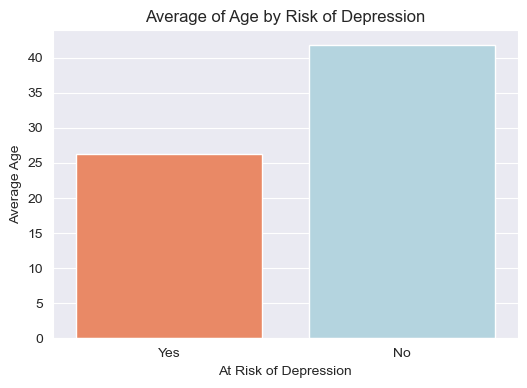

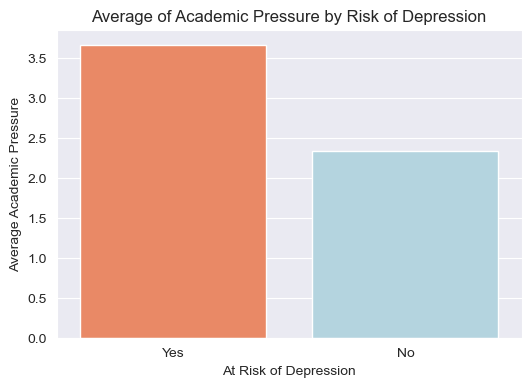

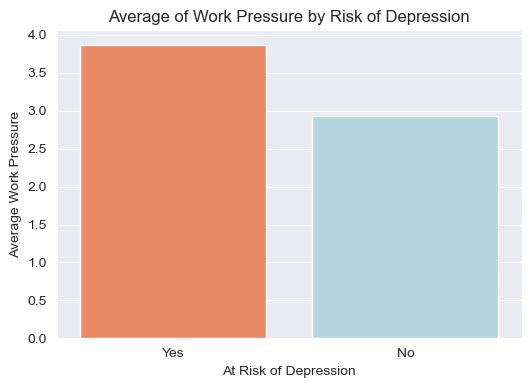

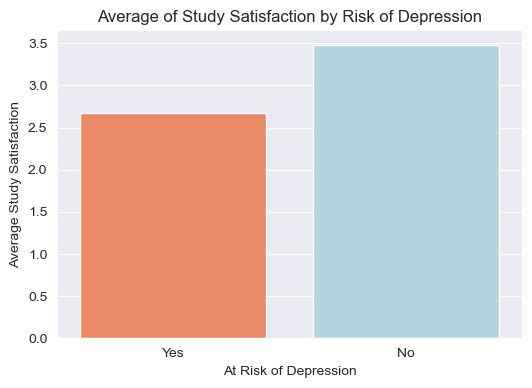

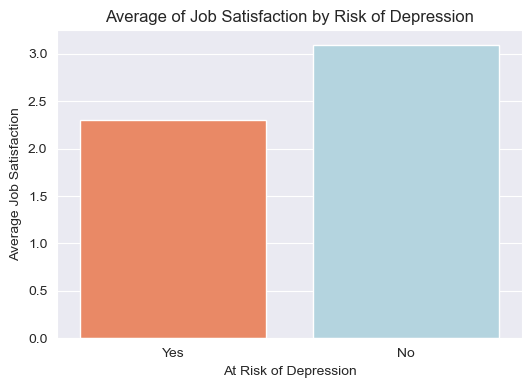

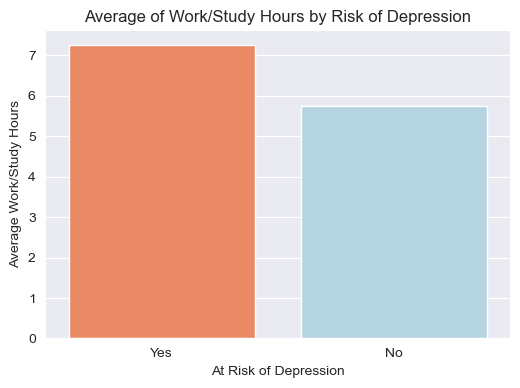

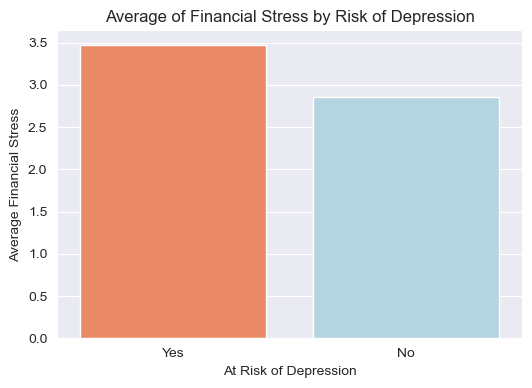

In [19]:
# Plot each column, grouped by risk of depression
for column in stat_sig_num_cols:
    data = {
        'Risk': ['Yes', 'No'],
        'Mean': [at_risk_df[column].mean(), not_at_risk_df[column].mean()]
    }
    temp_df = pd.DataFrame(data)

    label = column.replace('_', ' ').title()
    colors = {'Yes': 'coral', 'No': 'lightblue'}
    
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x='Risk', y='Mean', data=temp_df, palette=colors, hue='Risk')
    ax.set_title(f'Average of {label} by Risk of Depression')
    ax.set_xlabel('At Risk of Depression')
    ax.set_ylabel(f'Average {label}')
    plt.show();

These are really helpful to visualize the difference in means between the two groups. Let's take this one step further to better understand how the distribution of responses differs by each group!

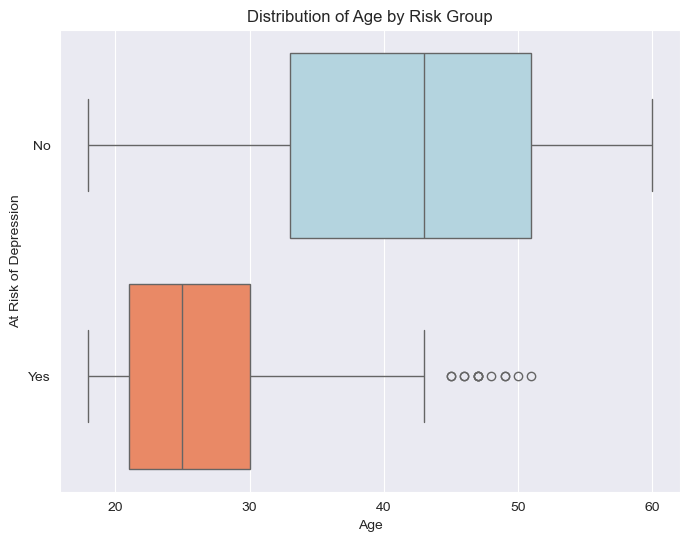

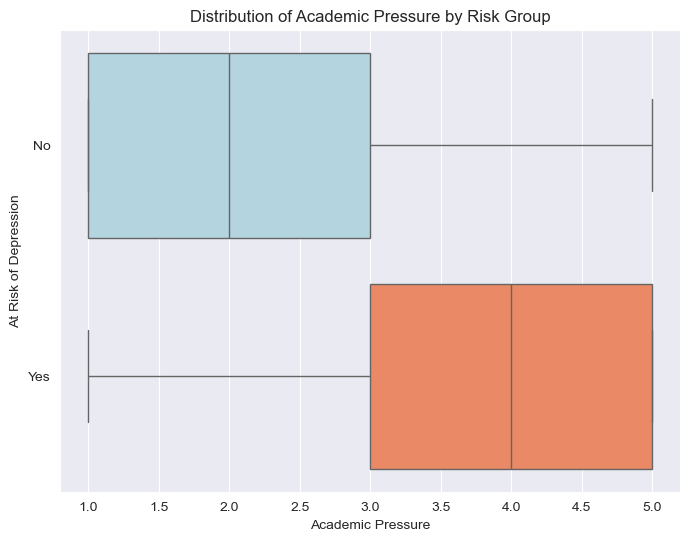

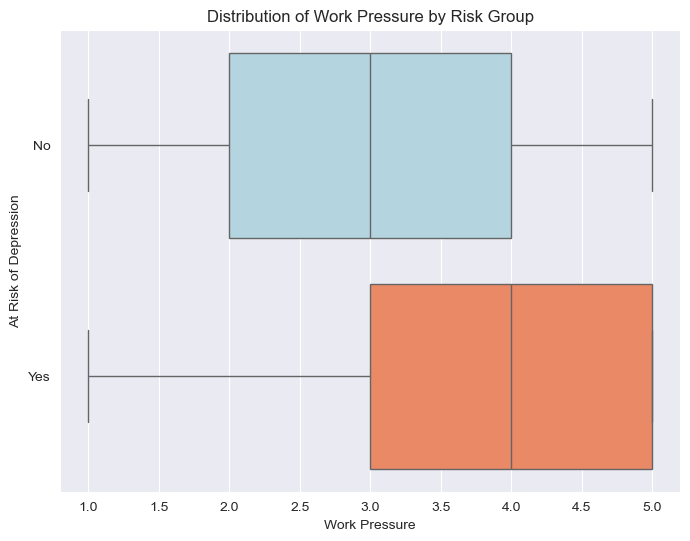

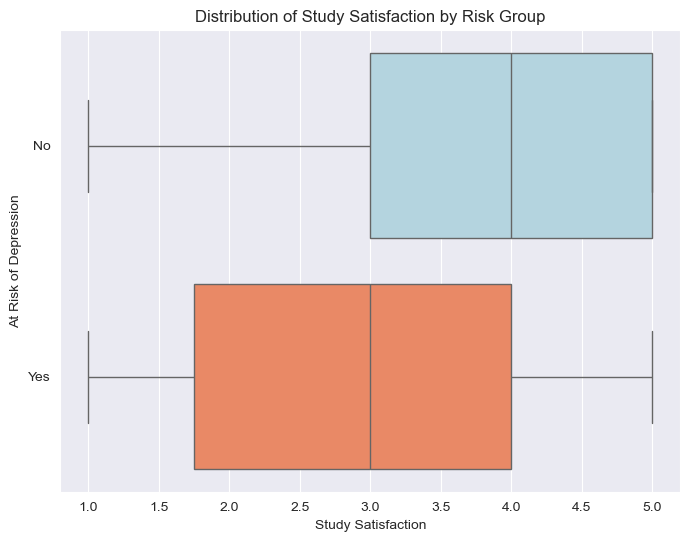

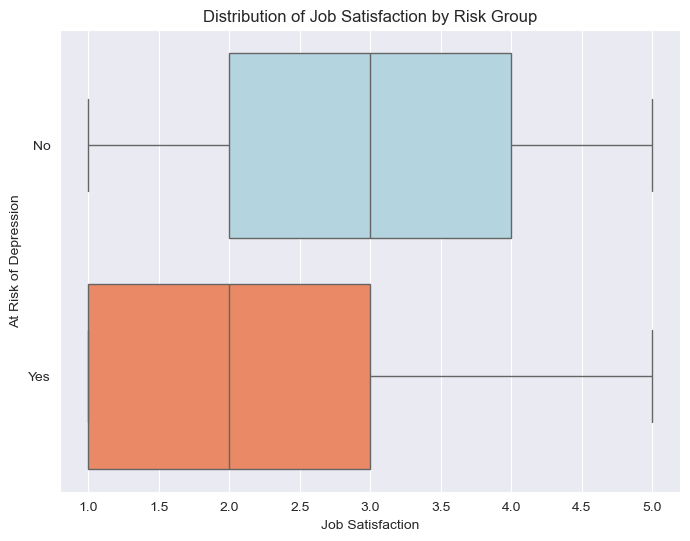

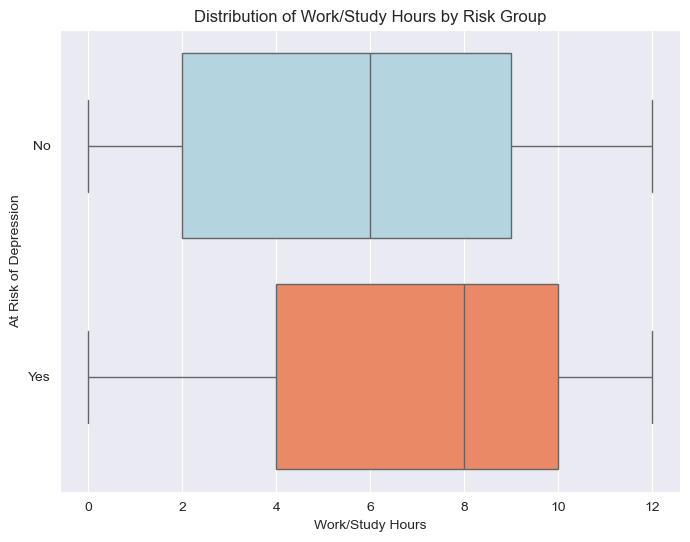

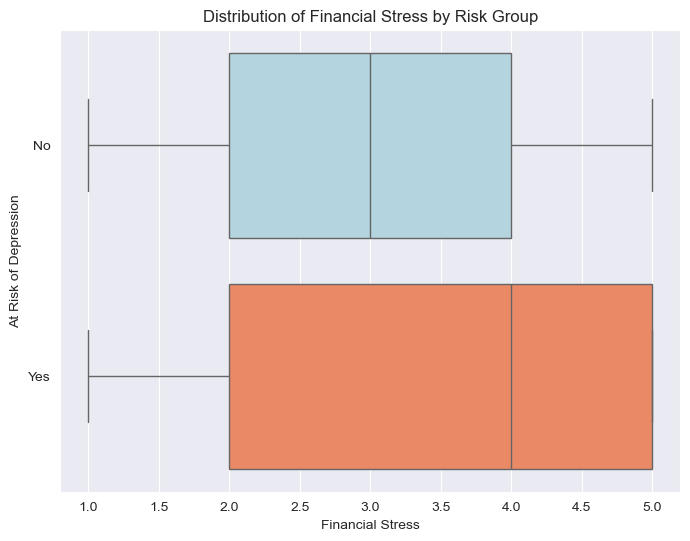

In [20]:
# Plot distributions of each column, grouped by risk of depression
for column in stat_sig_num_cols:
    plt.figure(figsize=(8, 6))
    x = column
    y = 'depression'
    colors = {'Yes': 'coral', 'No': 'lightblue'}
    label = column.replace('_', ' ').title()  
    
    sns.boxplot(x=x, y=y, data=df, palette=colors, hue=y)
    plt.title(f"Distribution of {label} by Risk Group")
    plt.xlabel(label)
    plt.ylabel('At Risk of Depression')
    plt.show();

Now that we have an understanding of the differences of the numeric columns. Let's investigate the differences for categorical data.

### Categorical Data Differences

In [21]:
cat_cols

Index(['gender', 'city', 'working_professional_or_student', 'profession',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts',
       'family_history_of_mental_illness', 'depression'],
      dtype='object')

In [22]:
# At risk summary
at_risk_df.describe(include='object')

,gender,city,working_professional_or_student,profession,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,family_history_of_mental_illness,depression
count,455,455,455,146,455,455,455,455,455,455
unique,2,30,2,35,4,3,27,2,2,1
top,Male,Hyderabad,Student,Teacher,Less than 5 hours,Unhealthy,Class 12,Yes,Yes,Yes
freq,241,28,252,28,141,204,126,360,231,455


In [23]:
# Non-risk summary
not_at_risk_df.describe(include='object')

,gender,city,working_professional_or_student,profession,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,family_history_of_mental_illness,depression
count,2101,2101,2101,1737,2101,2101,2101,2101,2101,2101
unique,2,30,2,35,4,3,27,2,2,1
top,Male,Meerut,Working Professional,Teacher,7-8 hours,Healthy,Class 12,No,No,No
freq,1092,87,1851,294,544,732,149,1212,1087,2101


Between the at risk group and the non-risk group we see:
* Males are the dominant class type.
* Student are at higher risk than working professionals.
* Teachers appear as the most common occupation in both groups.
* Those at risk of depression sleep >=2 hours less than the not-at-risk group, sleeping less than 5 hours on average.
* Diet is most commonly 'unhealthy' for at-risk group and 'healthy' for not-at-risk group.
* Approximately 79% of respondents in at-risk group report having suicidal thoughts at least once while only 58%.
* Nearly half or respondents in both groups report family history of mental illness.

### Statistical Analysis

Because there are many cities and degree types I will omit those from my statistical analysis. To start, let's set up a contingency table to compare values using a Chi-Squared test.

In [24]:
# H0: There is no significant difference in the distribution of values for the given column for the at-risk vs not at risk groups.
# H1: There is a significant difference in the distribution of values for the given column for the at risk and not at risk groups.
alpha = 0.05

for column in cat_cols.drop('depression'):
    counts_1 = at_risk_df[column].value_counts()
    counts_2 = not_at_risk_df[column].value_counts()

    contingency_table = pd.concat([counts_1, counts_2], axis=1, sort=True).dropna()
    contingency_table.columns = ['At Risk', 'Not at Risk']

    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    if p_value < alpha:
        print(f"{column}: Reject the null: There is a significant difference in distributions.")
    else:
        print(f"{column}: Fail to reject the null: No significant difference in distributions.")


gender: Fail to reject the null: No significant difference in distributions.
city: Fail to reject the null: No significant difference in distributions.
working_professional_or_student: Reject the null: There is a significant difference in distributions.
profession: Fail to reject the null: No significant difference in distributions.
sleep_duration: Reject the null: There is a significant difference in distributions.
dietary_habits: Reject the null: There is a significant difference in distributions.
degree: Reject the null: There is a significant difference in distributions.
have_you_ever_had_suicidal_thoughts: Reject the null: There is a significant difference in distributions.
family_history_of_mental_illness: Fail to reject the null: No significant difference in distributions.


In [25]:
# Isolate statistically significant columns
stat_sig_cat_cols = [
    'working_professional_or_student',
    'sleep_duration',
    'dietary_habits',
    'degree',
    'have_you_ever_had_suicidal_thoughts'
]

### Data Visualization

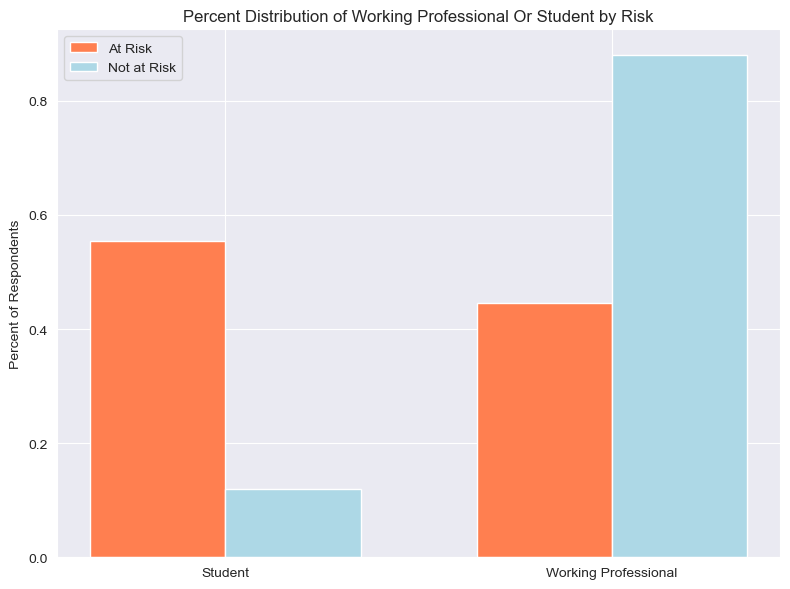

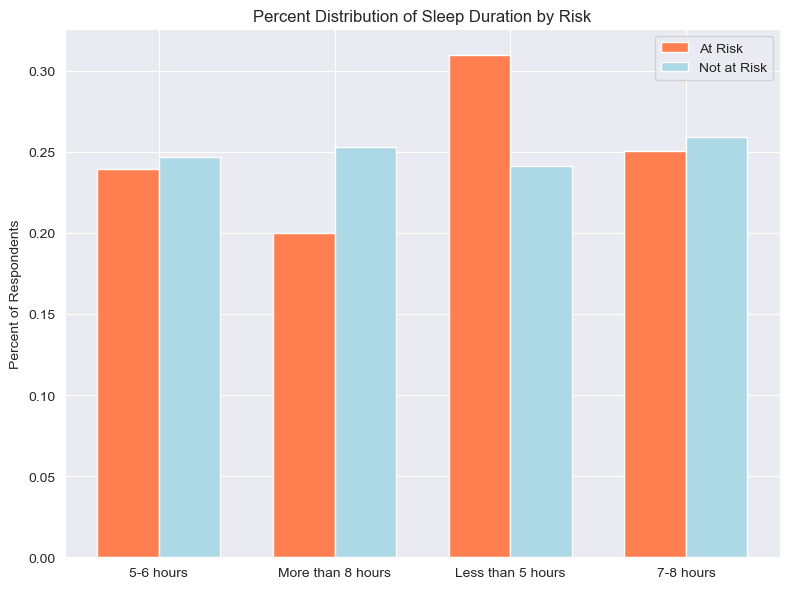

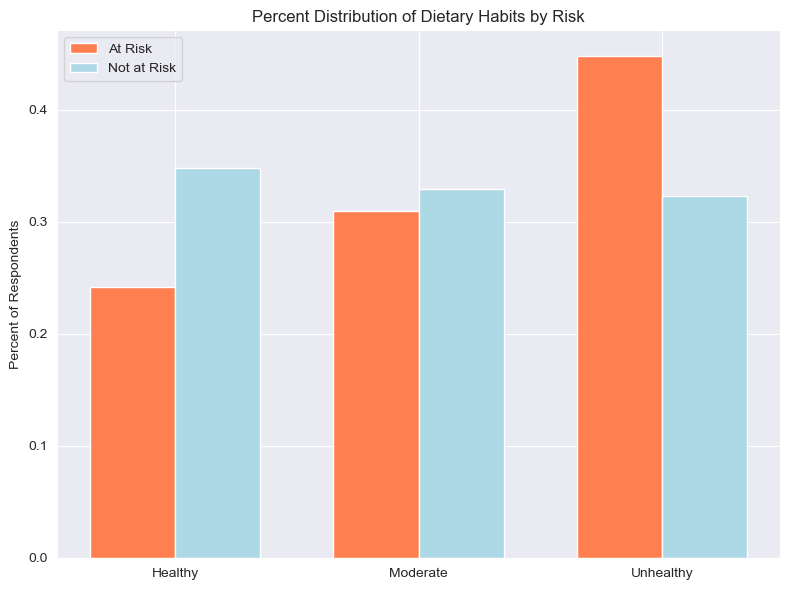

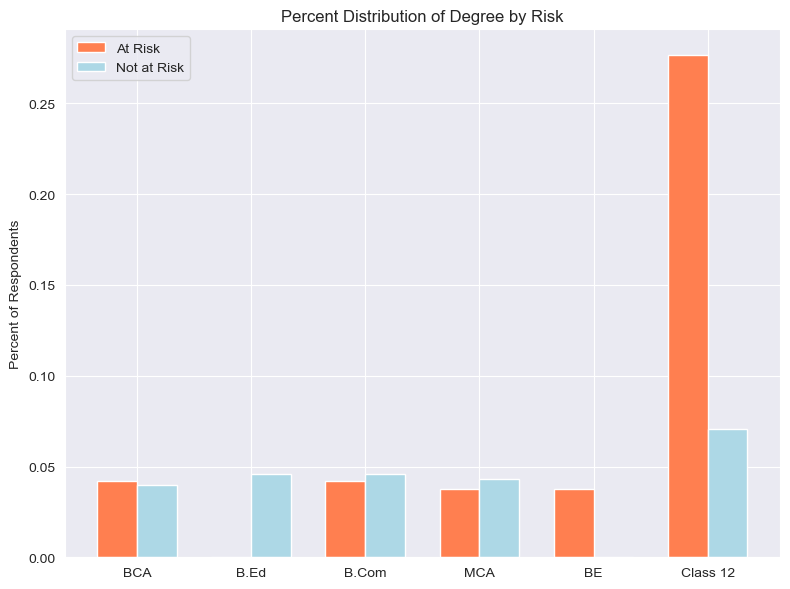

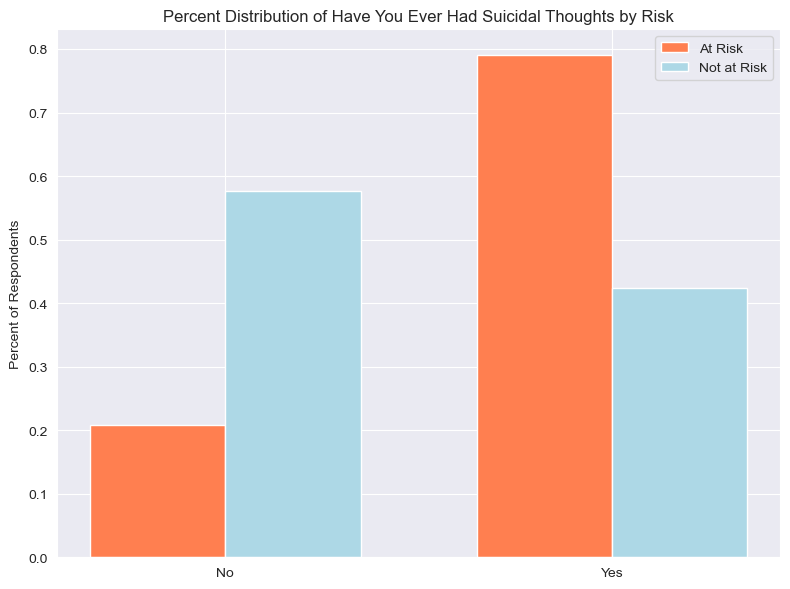

In [26]:
# Plot distributions by percentage, grouped by risk of depression
for column in stat_sig_cat_cols:
    data_1 = at_risk_df[column].value_counts(normalize=True).head()
    data_2 = not_at_risk_df[column].value_counts(normalize=True).head()
    
    # Determine the union of categories from both groups
    categories = list(set(data_1.index).union(set(data_2.index)))

    x = np.arange(len(categories))
    y1 = [data_1.get(cat, 0) for cat in categories]
    y2 = [data_2.get(cat, 0) for cat in categories]
    label = column.replace("_", " ").title()

    width = 0.35 
    
    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, y1, width, color='coral', label='At Risk')
    plt.bar(x + width/2, y2, width, color='lightblue', label='Not at Risk')
    
    plt.title(f'Percent Distribution of {label} by Risk')
    plt.ylabel('Percent of Respondents')
    plt.xticks(x, categories)
    plt.legend()
    plt.tight_layout()
    plt.show();

Interestingly, we see:
* Working professionals are significantly less likely to be at risk of depression.
* While the distributions between groups vary at a statisticaly significant level, there are a considerable number of people in the not at risk group for each of following areas:
    * All categories of sleep duration
    * All categories of dietary habits
* The risk of depression is markedly higher for individuals who discontinue education after 12th grade.
* Previous thoughts of suicide are not clearly indicative of depression risk, however, those at risk do report more frequently that they have had thoughts of suicide.

### Trends Within the At-Risk Group

Now that we've explored the differences between the at risk group and the not at risk group, let's try to better understand the factors that contribute to risk of depression.

In [27]:
at_risk_df.head()

,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work/study_hours,financial_stress,family_history_of_mental_illness,depression
14,Male,18,Ahmedabad,Working Professional,NaN,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Unhealthy,Class 12,Yes,7,3,No,Yes
28,Male,25,Rajkot,Student,NaN,1.0,NaN,7.21,3.0,NaN,5-6 hours,Unhealthy,MBBS,Yes,10,4,No,Yes
40,Male,19,Rajkot,Student,NaN,4.0,NaN,9.05,4.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,1,4,Yes,Yes
41,Female,34,Faridabad,Student,NaN,4.0,NaN,9.96,2.0,NaN,More than 8 hours,Moderate,B.Com,Yes,6,2,No,Yes
43,Female,20,Pune,Student,NaN,4.0,NaN,6.17,1.0,NaN,More than 8 hours,Healthy,Class 12,Yes,3,4,Yes,Yes


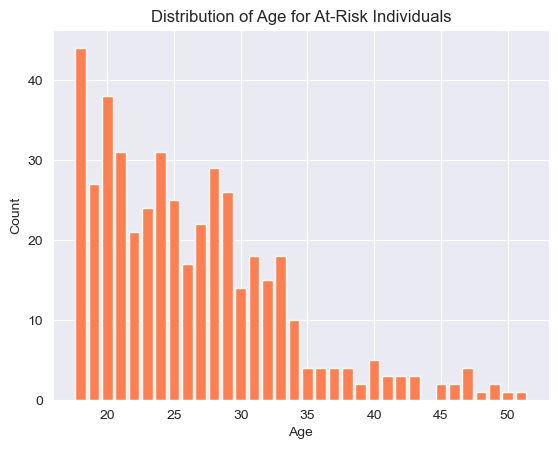

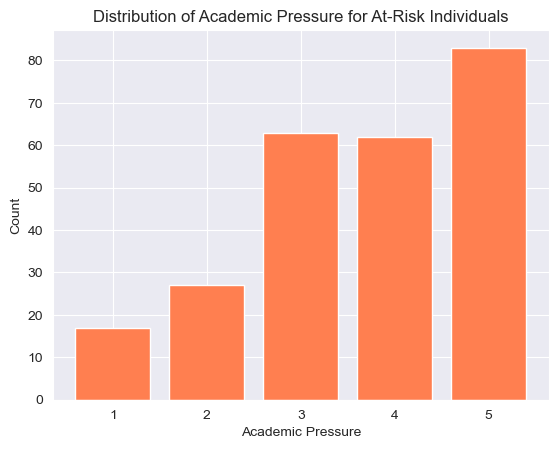

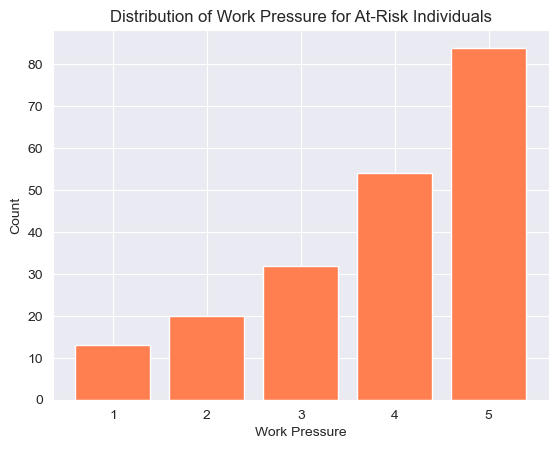

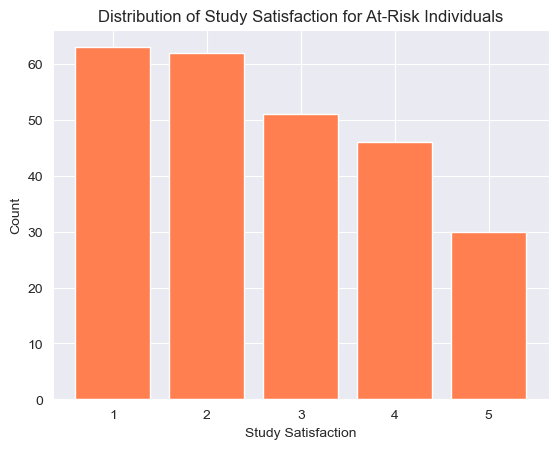

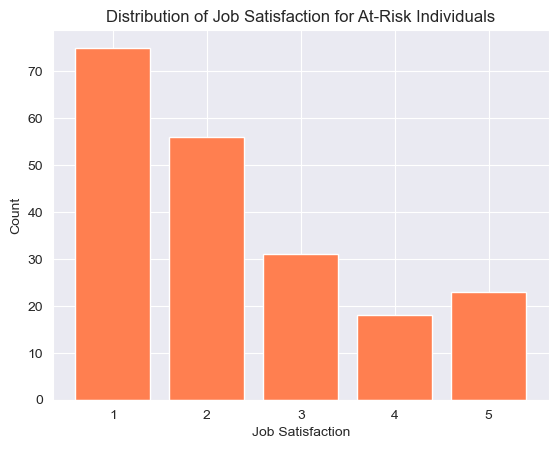

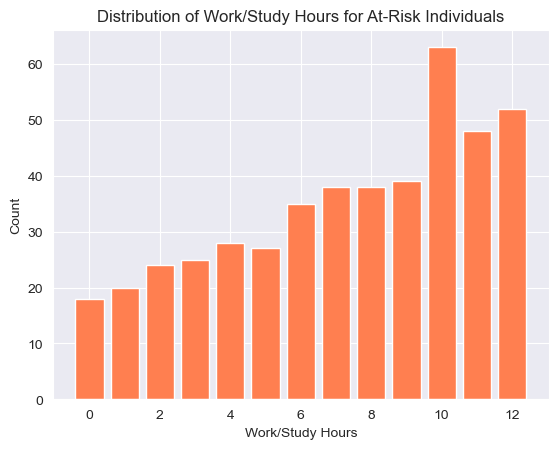

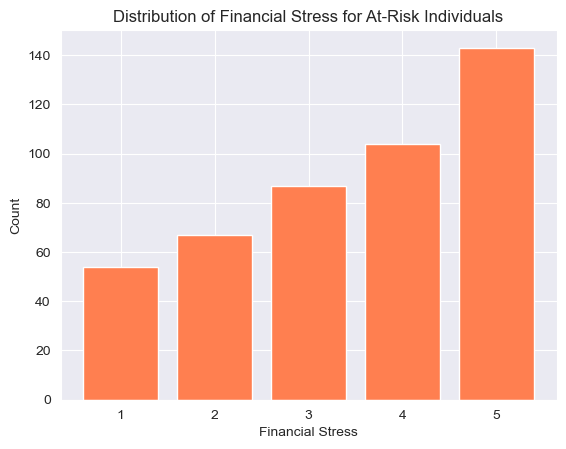

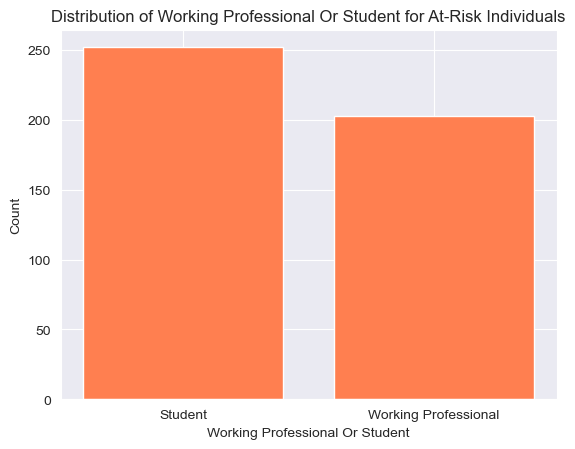

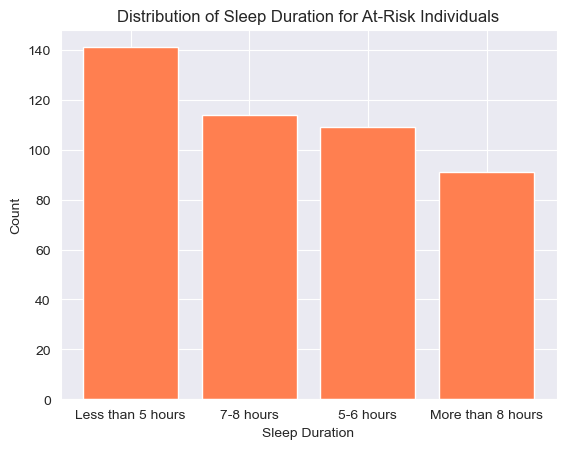

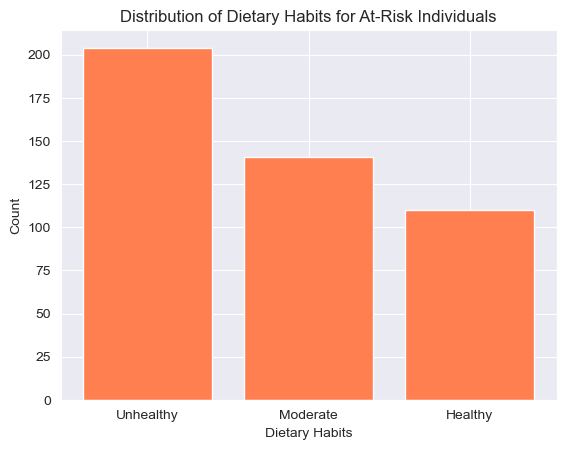

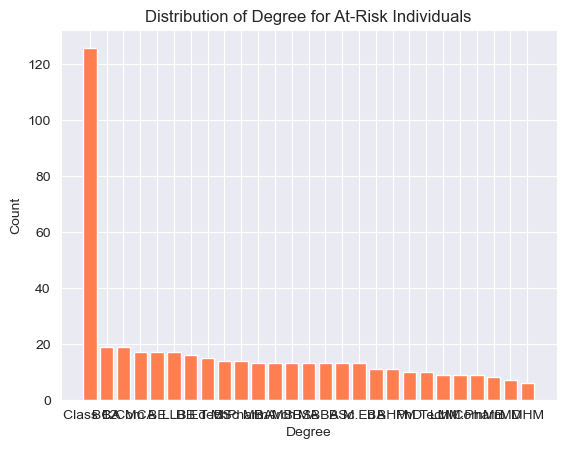

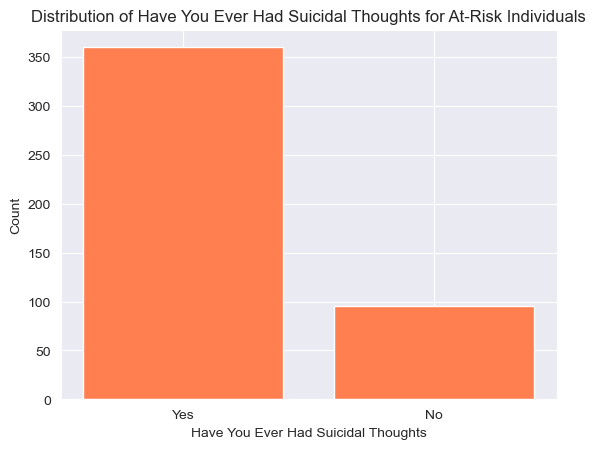

In [28]:
# Combine all statistically significant features
sig_cols = list(stat_sig_num_cols) + list(stat_sig_cat_cols)

# Plot the distribution of each feature
for column in sig_cols:   
    data = at_risk_df[column].value_counts()
    x = data.index
    y = data.values
    label = column.replace('_', ' ').title()
    
    plt.bar(x, y, color='coral')
    plt.title(f"Distribution of {label} for At-Risk Individuals")
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.show();

Now that we have a more clear understanding of the responses of at-risk individuals, let's investigate how each category relates to one another using a correlation matrix.

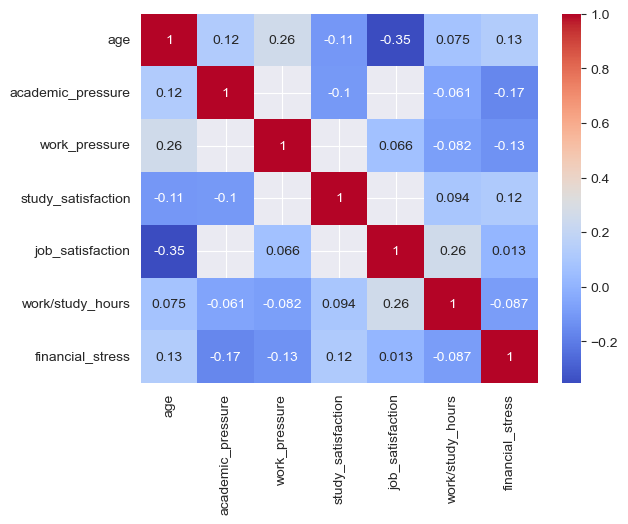

In [29]:
corr_matrix = at_risk_df[stat_sig_num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

Here we see that each feature is weekly correlated with each other feature. We also see a few holes where that data does not overlap, such as with work pressure and academic pressure.

## Results

| `Risk Factor`             | `At Risk`            | `Not at Risk`        |
| ------------------------- | -------------------- | -------------------- |
| Age                       | 26                   | 42                   |
| Academic Pressure         | 3.6                  | 2.3                  |
| Work Pressure             | 3.9                  | 2.9                  |
| Study Satisfaction        | 2.7                  | 3.5                  |
| Job Satisfaction          | 2.3                  | 3.1                  |
| Work/Study Hours          | 7.3                  | 5.8                  |
| Financial Stress          | 3.5                  | 2.9                  |
| Occupation                | Student              | Working Professional |
| Sleep Duration            | < 5 Hours            | 7-8 Hours            |
| Dietary Habits            | Unhealthy            | Healthy              |
| Degree                    | Class 12             | Class 12             |
| Prev. Thoughts of Suicide | Yes                  | No                   |

This analysis shows that there are statistically significant differences in many response categories between depression risk groups. Those at risk of depression are primarily younger in age, students with at most a high school education, have poor sleeping habits, and are not eating well. They also more commonly identify as having past thoughts of suicide and have real or perceived:
* Increased academic pressure
* Increased work pressure
* Decreased job satisfaction
* Increased amounts of time working/studying 
* Increased financial stress

## Conclusion

This survey is based on individual self-reporting and does not include any medical data related to depression diagnoses. While the survey falls short of offering clincial information, it is still helpful to consider risk factors for depression so that medical professionals can make accurate diagnoses and tailored recommendations for holistic care. Understanding the habits and stresses individuals face is only part of the solution and more research can be conducted in clincial setting to better understand contributing factors to mental wellness and depression.